In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# from pandas_profiling import ProfileReport


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [41]:
df = pd.read_csv("CancerSurvival.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [43]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead


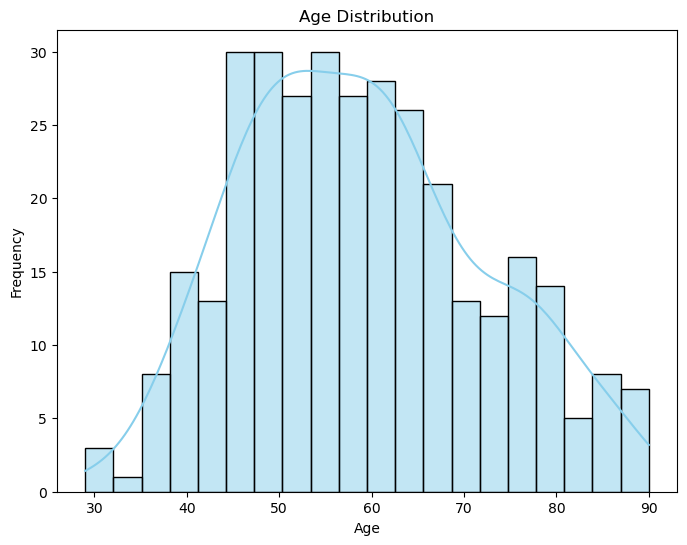

In [44]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

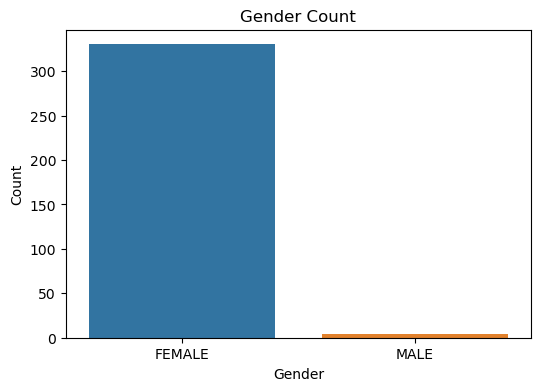

In [45]:
# Gender count
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


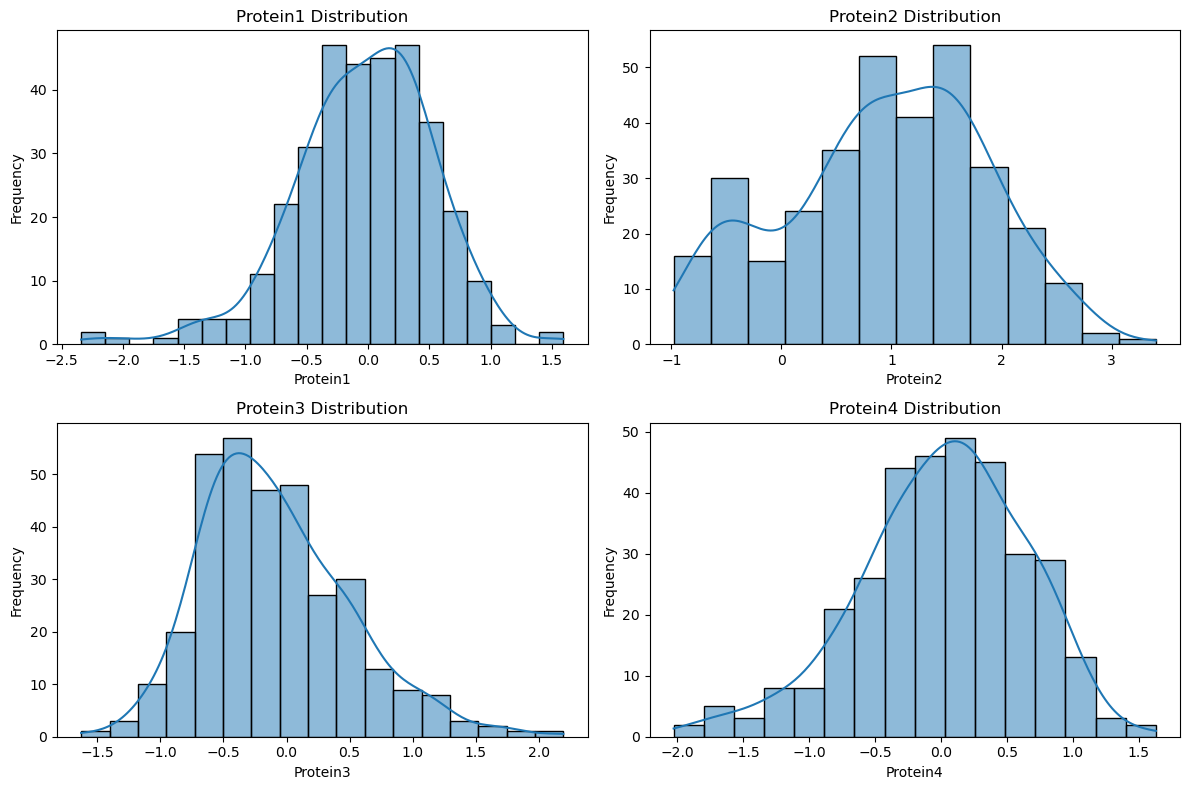

In [46]:
# Protein distributions
protein_cols = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
plt.figure(figsize=(12, 8))
for i, col in enumerate(protein_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


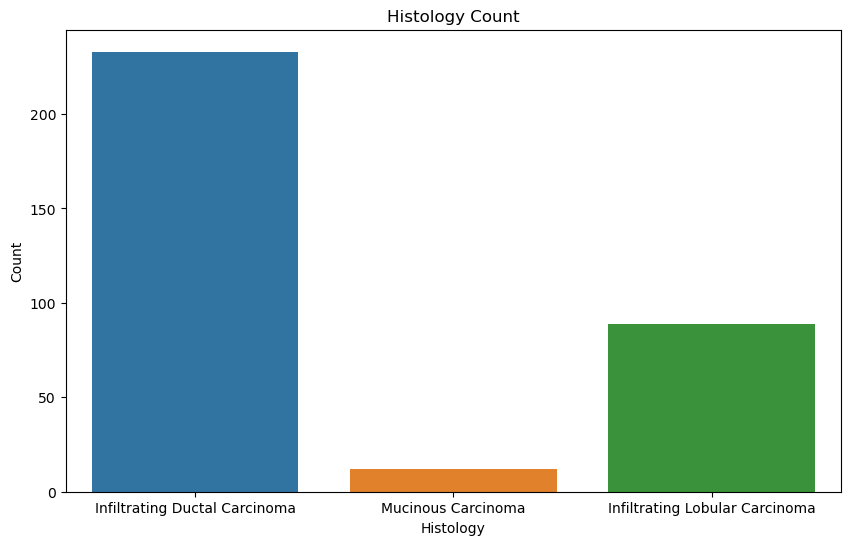

In [47]:
# Histology count
plt.figure(figsize=(10, 6))
sns.countplot(x='Histology', data=df)
plt.title('Histology Count')
plt.xlabel('Histology')
plt.ylabel('Count')
plt.show()

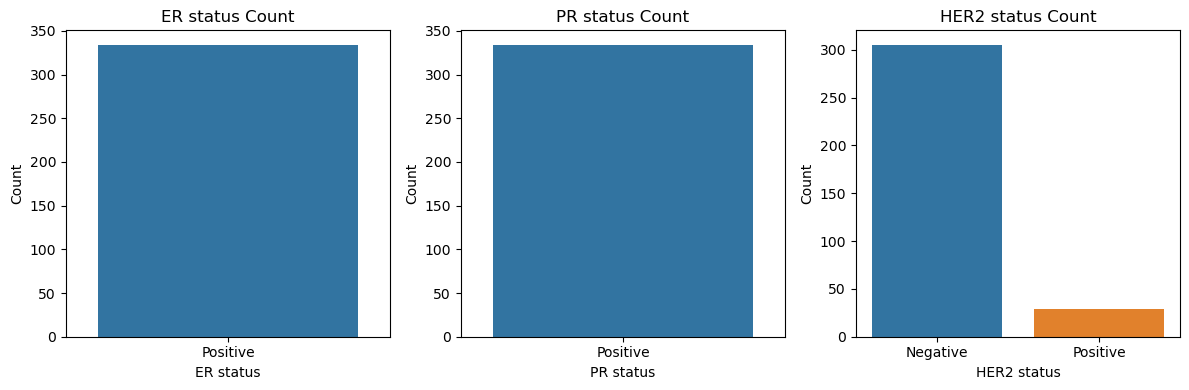

In [48]:
# ER, PR, HER2 status count
status_cols = ['ER status', 'PR status', 'HER2 status']
plt.figure(figsize=(12, 4))
for i, col in enumerate(status_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


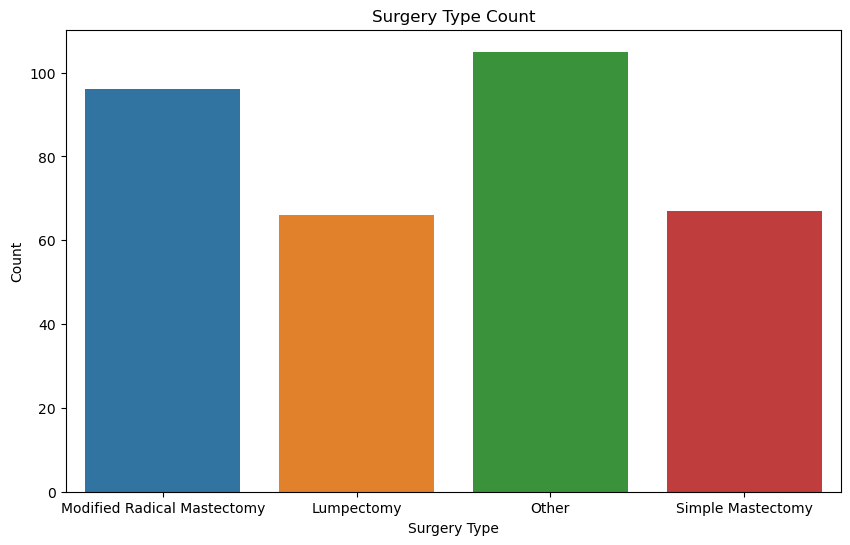

In [49]:
# Surgery type count
plt.figure(figsize=(10, 6))
sns.countplot(x='Surgery_type', data=df)
plt.title('Surgery Type Count')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.show()

In [51]:
# # Correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [52]:
# drop 
df.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'], inplace=True)

In [53]:
def create_dummy_data(data):
    """
    Generate dummy data for all categorical columns in the DataFrame.
    
    Parameters:
        data (DataFrame): The input DataFrame.
    
    Returns:
        DataFrame: A new DataFrame with dummy variables for all categorical columns.
    """
    # Get list of categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    # Create dummy variables for categorical columns
    dummy_data = pd.get_dummies(data, columns=categorical_columns)
    
    return dummy_data

In [54]:
# df = create_dummy_data(df)

In [55]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [56]:
df.dropna(inplace = True)

In [57]:
# Preprocessing
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Tumour_Stage'] = label_encoder.fit_transform(df['Tumour_Stage'])
df['Histology'] = label_encoder.fit_transform(df['Histology'])
df['ER status'] = label_encoder.fit_transform(df['ER status'])
df['PR status'] = label_encoder.fit_transform(df['PR status'])
df['HER2 status'] = label_encoder.fit_transform(df['HER2 status'])
df['Surgery_type'] = label_encoder.fit_transform(df['Surgery_type'])
df['Patient_Status'] = label_encoder.fit_transform(df['Patient_Status'])

# Split the data into features and target variable
X = df.drop(columns=['Patient_Status'])
y = df['Patient_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8153846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        53
           1       0.00      0.00      0.00        12

    accuracy                           0.82        65
   macro avg       0.41      0.50      0.45        65
weighted avg       0.66      0.82      0.73        65



c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
